# Production Model: Neural Networks 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import KNNImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

In [2]:
def errors(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared = False)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return (f'root mean sqaured error is {rmse}, r squared is {r2}, and mean absolute error is {mae}')

In [4]:
df = pd.read_csv('../data/cleaned_aqi_and_temp_data_2017-2019.csv')

In [5]:
df["weekday"] = df["weekday"].astype("category")

df["month"] = df["month"].astype("category")

df['date'] = pd.to_datetime(df['date'])

df.drop('pct_change_aqi', axis = 1, inplace = True)

df.set_index('date', inplace = True)

df.head()

,co_max,co_aqi_val,no2_max,no2_aqi_val,ozone_max,ozone_aqi_val,pm10_mean,pm10_aqi_val,pm2.5_mean,pm2.5_aqi_val,so2_max,so2_aqi_val,cumulative_aqi,temp_high,temp_low,temp_avg,month,weekday
date,,,,,,,,,,,,,,,,,,
2017-01-01,0.5,6.0,36.0,34.0,0.026,24.0,21.0,19.0,9.6,40.0,5.0,7.0,40.0,43,27,35.0,1,6
2017-01-02,0.5,6.0,33.0,31.0,0.009,8.0,18.0,17.0,14.1,55.0,2.0,3.0,55.0,50,34,42.0,1,0
2017-01-03,0.4,5.0,24.0,23.0,0.015,14.0,9.0,8.0,7.7,32.0,0.0,0.0,32.0,50,40,45.0,1,1
2017-01-04,0.2,2.0,NaN,NaN,0.027,25.0,19.0,18.0,4.6,19.0,0.0,0.0,25.0,40,20,30.0,1,2
2017-01-05,NaN,NaN,19.0,18.0,0.020,19.0,11.0,10.0,5.3,22.0,0.0,0.0,22.0,21,13,17.0,1,3


In [6]:
X = df.drop(columns = ['cumulative_aqi', 'temp_high', 'temp_low', 'co_aqi_val', 'no2_aqi_val', 'pm10_aqi_val', 'pm2.5_aqi_val', 'so2_aqi_val', 'ozone_aqi_val'])
y = df['cumulative_aqi']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

knn = KNNImputer()

X_train_knn = knn.fit_transform(X_train_scaled)

X_test_knn = knn.transform(X_test_scaled)

In [9]:
model12 = Sequential()
model12.add(Dense(50, activation = 'relu'))
model12.add(Dense(200, activation = 'relu'))
model12.add(Dense(50, activation = 'relu'))
model12.add(Dense(50, activation = 'relu'))
model12.add(Dense(1,))

model12.compile(optimizer = 'adam', loss='mse', metrics = ['mse'])
early_stop = EarlyStopping(patience = 5) 
history12 = model12.fit(
    X_train_knn,
    y_train,
    batch_size = 100,
    callbacks = [early_stop],
    validation_data=(X_test_knn, y_test),
    epochs= 100
)

Epoch 1/100
9/9 [==============================] - 1s 42ms/step - loss: 2009.6313 - mse: 2009.6313 - val_loss: 1911.8409 - val_mse: 1911.8409
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1823.2309 - mse: 1823.2309 - val_loss: 1538.9347 - val_mse: 1538.9347
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 1309.4782 - mse: 1309.4782 - val_loss: 801.9283 - val_mse: 801.9283
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 643.7558 - mse: 643.7558 - val_loss: 285.0615 - val_mse: 285.0615
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 292.5989 - mse: 292.5989 - val_loss: 256.3702 - val_mse: 256.3702
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 177.9984 - mse: 177.9984 - val_loss: 146.0750 - val_mse: 146.0750
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 129.2914 - mse: 129.2914 - val_loss: 106.5748 - val_mse: 106.5748
Epoch 8/100
9/9 [=============

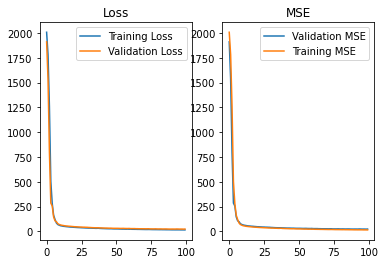

In [10]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history12.history['loss'], label = 'Training Loss')
plt.plot(history12.history['val_loss'], label = 'Validation Loss')
plt.legend();

plt.subplot(1, 2, 2)
plt.title('MSE')
plt.plot(history12.history['val_mse'], label = 'Validation MSE')
plt.plot(history12.history['mse'], label = 'Training MSE')
plt.legend();

from the loss and MSE graphs we can see that the data is not over fit with training and validation

In [11]:
pred12 = model12.predict(X_test_knn)

In [12]:
errors(y_test, pred12)

'root mean sqaured error is 4.804812076890751, r squared is 0.905507507476178, and mean absolute error is 3.051540715851053'

highest r2 score and lowest msme without overfitting showing best model overall

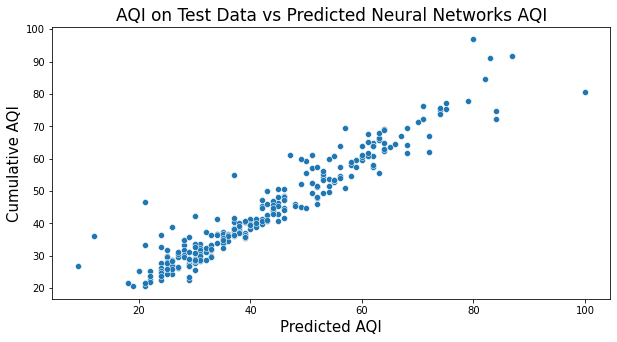

In [17]:
plt.subplots(figsize = (10,5))
plt.title('AQI on Test Data vs Predicted Neural Networks AQI', fontsize = 17)
plt.xlabel('Predicted AQI', fontsize = 15)
plt.ylabel('Cumulative AQI', fontsize = 15)
sns.scatterplot(x = y_test, y = pred12[:, 0]);


Scatterplot showing that predicted AQI is aligning with Cumulative AQI values in test data 

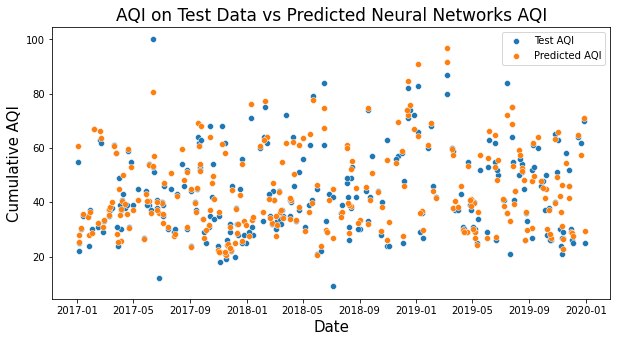

In [18]:
plt.subplots(figsize = (10,5))
plt.title('AQI on Test Data vs Predicted Neural Networks AQI', fontsize = 17)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Cumulative AQI', fontsize = 15)
sns.scatterplot(x = y_test.index, y = y_test, label = 'Test AQI');
sns.scatterplot(x = y_test.index, y = pred12[:, 0], label = 'Predicted AQI');


Test AQI values in blue align very well with the predicted aqi values displayed in orange from our model